<a href="https://colab.research.google.com/github/robinhester/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/Wrangle_ML_LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [0]:
import pandas as pd 

In [0]:
got=pd.read_csv('https://raw.githubusercontent.com/robinhester/DS-Unit-2-Applied-Modeling/master/data/gameofthrones.csv')

In [4]:
got.head()

,Unnamed: 0,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [5]:
got.tail()

,Unnamed: 0,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1941,1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,299.0,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,299.0,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.130435,1
1945,1945,1946,0,0,0.093,0.907,Tytos Lannister,Casterly Rock,1,NaN,220.0,267.0,NaN,NaN,NaN,House Lannister,Jeyne Marbrand,0,0,1,1,1,NaN,NaN,NaN,1.0,1,1,47.0,4,1,0,0.210702,0


In [6]:
got.columns

Index(['Unnamed: 0', 'S.No', 'actual', 'pred', 'alive', 'plod', 'name',
       'title', 'male', 'culture', 'dateOfBirth', 'DateoFdeath', 'mother',
       'father', 'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isAliveMother', 'isAliveFather', 'isAliveHeir',
       'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'boolDeadRelations', 'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [7]:
got.describe(include='all')

,Unnamed: 0,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946,938,1946.000000,677,433.000000,444.000000,21,26,23,1519,276,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1946,262,NaN,64,NaN,NaN,17,20,22,347,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Eglantine,Ser,NaN,Northmen,NaN,NaN,Daenaera Velaryon,Aegon I Targaryen,Jaehaerys Targaryen,Night's Watch,Walder Frey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1,384,NaN,124,NaN,NaN,2,2,2,105,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,972.500000,973.500000,0.745632,0.687050,0.634470,0.365530,NaN,NaN,0.619219,NaN,1577.364896,2950.193694,NaN,NaN,NaN,NaN,NaN,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,561.906131,0.435617,0.463813,0.312637,0.312637,NaN,NaN,0.485704,NaN,19565.414460,28192.245529,NaN,NaN,NaN,NaN,NaN,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,-28.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,486.250000,487.250000,0.000000,0.000000,0.391250,0.101000,NaN,NaN,0.000000,NaN,240.000000,282.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,972.500000,973.500000,1.000000,1.000000,0.735500,0.264500,NaN,NaN,1.000000,NaN,268.000000,299.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1458.750000,1459.750000,1.000000,1.000000,0.899000,0.608750,NaN,NaN,1.000000,NaN,285.000000,299.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000


In [10]:
got.house.value_counts(dropna=False).head(10)

NaN                427
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
House Lannister     49
House Greyjoy       41
House Tyrell        36
House Martell       29
House Osgrey        21
Name: house, dtype: int64

In [11]:
got.title.value_counts(dropna=False).head(10)

NaN            1008
Ser             384
Maester          39
Archmaester      21
Lord             20
Septon           18
Winterfell       17
Princess         16
Lady             12
Septa            10
Name: title, dtype: int64

In [13]:
got.male.value_counts(dropna=False)

1    1205
0     741
Name: male, dtype: int64

In [0]:
def data_wrangle(X):
  X=X.copy()

  duplicate=['Unnamed: 0', 'S.No', 'actual', 
             'pred', 'alive', 'plod']

  X=X.drop(columns=duplicate)

  X=X.fillna('Missing')

  leakage=['DateoFdeath', 'book1', 'book2', 
           'book3', 'book4','book5']

  X=X.drop(columns=leakage)

  top7houses=["Night's Watch", 'House Frey','House Stark',
              'House Stark','House Targaryen','House Lannister',
              'House Greyjoy','House Tyrell']

  X.loc[~X['house'].isin(top7houses),'house']== 'Other'

  top5=['Ser','Maester','Archmaester','Lord',
        'Septon','Winterfell','Missing']

  X.loc[~X['title'].isin(top5),'title']=='Other'
  X.title.replace('Missing','No Title')

  X['Female']=X.male == 0
  X.male.replace(1, 'True')
  X.male.replace(0,'False')

  X.isAliveMother.replace(1,'True')
  X.isAliveMother.replace(0,'False')

  X.isAliveFather.replace(1,'True')
  X.isAliveFather.replace(0,'False')

  X.isAliveHeir.replace(1,'True')
  X.isAliveHeir.replace(0,'False')

  X.isAliveSpouse.replace(1,'True')
  X.isAliveSpouse.replace(0,'False')

  X.isMarried.replace(1,'True')
  X.isMarried.replace(0,'False')

  X.isNoble.replace(1,'True')
  X.isNoble.replace(0,'False')

  return X

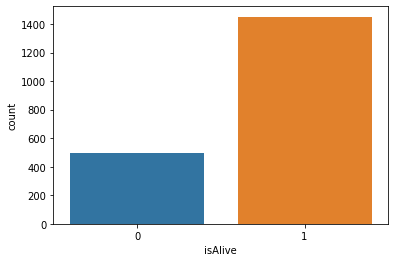

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(got.isAlive)
plt.show()

In [17]:
got.isAlive.value_counts(normalize=True)

1    0.745632
0    0.254368
Name: isAlive, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
train=got.copy()
train, test = train_test_split(train, train_size=.80, test_size=.20, 
                              stratify=train['isAlive'], random_state=42)

train, val = train_test_split(train, test_size=len(test), 
                              stratify=train['isAlive'], random_state=42)

In [19]:
train.shape, val.shape, test.shape

((1166, 34), (390, 34), (390, 34))

In [20]:
train.isAlive.value_counts(normalize=True)

1    0.745283
0    0.254717
Name: isAlive, dtype: float64

In [0]:
train=data_wrangle(train)
val=data_wrangle(val)
test=data_wrangle(test)

In [24]:
train.shape, val.shape, test.shape

((1166, 34), (390, 34), (390, 34))

In [36]:
train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,Female
1110,Jacks,Missing,0,northmen,Missing,Missing,Missing,Missing,House Stark,Missing,Missing,Missing,Missing,Missing,0,0,Missing,0,0,0,0.033445,1,True
1714,Grunt,Missing,1,Northmen,Missing,Missing,Missing,Missing,House Bolton,Missing,Missing,Missing,Missing,Missing,0,0,Missing,0,0,0,0.026756,1,False
960,Clubfoot Karl,Missing,1,Missing,Missing,Missing,Missing,Missing,Night's Watch,Missing,Missing,Missing,Missing,Missing,0,0,Missing,0,0,0,0.026756,0,False
381,Brenett,Maester,1,Missing,Missing,Missing,Missing,Missing,House Frey,Missing,Missing,Missing,Missing,Missing,0,1,Missing,0,0,0,0.003344,1,False
1720,Hazzea,Missing,0,Ghiscari,295,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,0,0,5,0,0,0,0.043478,0,True


In [26]:
!pip install category_encoders

     |████████████████████████████████| 102kB 2.4MB/s 


In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [45]:
target='isAlive'
features= train.drop(columns=[target]).columns
# print(features)
x_train=train[features]
y_train=train[target]
# y_train
x_val=val[features]
y_val=val[target]
#x_test
x_test=test[features]
y_test=test[target]

pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3)
)
pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)
print('Train Accuracy:', pipeline.score(x_train,y_train))
print('Accuracy Score:', pipeline.score(x_val,y_val))

Train Accuracy: 0.7735849056603774
Accuracy Score: 0.7615384615384615


In [46]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(x_val)[:, -1]
roc_auc_score(y_val, y_pred_proba)

0.7118435211218717

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
(fpr, tpr, thresholds)

(array([0.        , 0.01010101, 0.01010101, 0.01010101, 0.01010101,
        0.01010101, 0.01010101, 0.02020202, 0.03030303, 0.03030303,
        0.03030303, 0.04040404, 0.04040404, 0.04040404, 0.04040404,
        0.04040404, 0.04040404, 0.04040404, 0.04040404, 0.05050505,
        0.05050505, 0.05050505, 0.05050505, 0.06060606, 0.06060606,
        0.06060606, 0.07070707, 0.07070707, 0.07070707, 0.07070707,
        0.07070707, 0.07070707, 0.09090909, 0.09090909, 0.1010101 ,
        0.1010101 , 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.13131313, 0.13131313, 0.14141414, 0.14141414,
        0.14141414, 0.14141414, 0.15151515, 0.16161616, 0.16161616,
        0.17171717, 0.17171717, 0.17171717, 0.17171717, 0.18181818,
        0.18181818, 0.2020202 , 0.22222222, 0.22222222, 0.23232323,
        0.23232323, 0.24242424, 0.24242424, 0.25252525, 0.25252525,
        0.25252525, 0.25252525, 0.27272727, 0.28282828, 0.28282828,
        0.3030303 , 0.3030303 , 0.31313131, 0.31

Text(0, 0.5, 'True Positive Rate')

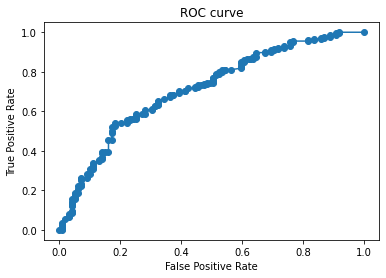

In [48]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [49]:
roc_auc_score(y_test, y_pred)

0.5368634801624492

Print X_train shape after encoding (1166, 22)


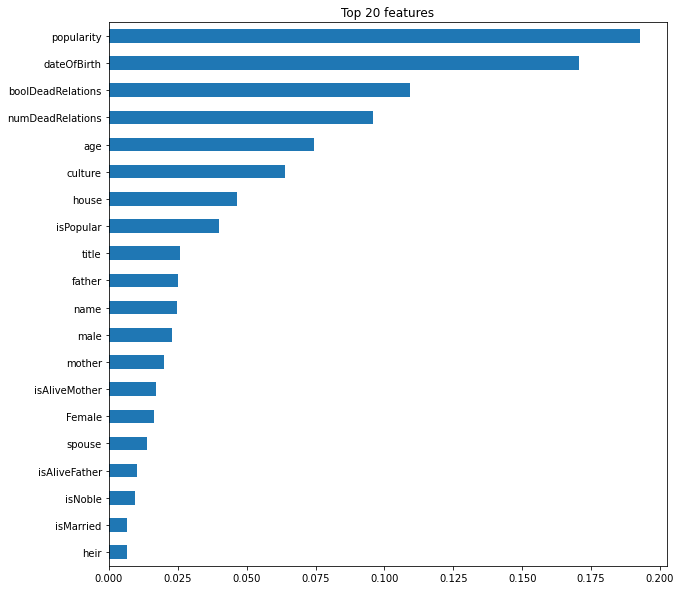

In [50]:
# Get encoded values
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(x_train)
print ('Print X_train shape after encoding', encoded.shape)

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();